In [2]:
import sys
print(sys.executable)


d:\red wine project\.venv-gpu\Scripts\python.exe


In [3]:
import xgboost as xgb
print(xgb.__version__)
print(xgb.build_info())


d:\red wine project\.venv-gpu\Lib\site-packages\xgboost\compat.py:105: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


1.6.0
{'BUILTIN_PREFETCH_PRESENT': False, 'CUDA_VERSION': [11, 0], 'DEBUG': False, 'MM_PREFETCH_PRESENT': True, 'THRUST_VERSION': [1, 9, 9], 'USE_CUDA': True, 'USE_NCCL': False, 'USE_OPENMP': True, 'USE_RMM': False}


In [4]:
import pandas as pd

In [5]:
# loading the red wine quality dataset from the kaggle website 
df = pd.read_csv("D:\\Wine quality project\\winequality-red.csv",)


In [6]:
df.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.isnull().sum() # checking for N/A data 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
sum(df.values < 0 ) # checking if any negative values are in dataset  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
df.duplicated().sum() # checking for dublicates in our dataset 

np.int64(240)

In [12]:
duble = df.duplicated(subset=df.columns.difference(['quality'])).sum() # checking which variables have dublicates, quality is excludedd from search due its small varuation 1-10
# Display the rows with identical features (ignoring 'quality')
df[df.duplicated(subset=df.columns.difference(['quality']), keep=False)] \
    .sort_values(by=['fixed acidity', 'volatile acidity'])
## there are some duplicates but i wont delete them now since i need more inspection before deleting them from dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
132,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
1488,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


<span style="color:orange; font-weight:bold;">
Data Pipeline
</span>


In [13]:
# DATA preprocessing 
#importing necessary libraries : 
import json 
from pathlib import Path
from typing import Tuple,Dict 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
SEED = 42  # setting the proper seed for reproducibility 
# feature_cols involves all independent variables that we use in our case all other dataset heads besides quality 
feature_cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
    "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target_col = "quality" # setting the target/ dependent variable
def load_wine_csv(path: str) -> pd.DataFrame:
    df=pd.read_csv(path)
    return df

# now we make sure our dataset is not missing data and all values are numeric since its essential for our prediction(classification)
def valid_sec(df: pd.DataFrame) -> None: 
    # missing content Alert 
    missings= [i for i in feature_cols + [target_col] if i not in df.columns]
    if missings: 
        raise ValueError(f"error 404 we are missing : {missings}")
    # checking for data-types 
    non_num = [i for i in feature_cols if not np.issubdtype(df[i].dtype,np.number)]
    if non_num : 
        raise TypeError(f"error 503 non numeric features founds at {non_num}")
    if not np.issubdtype(df[target_col].dtype,np.number): 
        raise TypeError("Target column must be numeric (quality).")
# now I just create a .summary function for better monitoration about dataset
def summary_df(df: pd.DataFrame) -> Dict:  
    desc = df[feature_cols].describe().T.round(3).to_dict(orient='index')
    class_counts = df[target_col].value_counts().sort_index().to_dict()
    summary = {
         "n_rows": int(df.shape[0]),
        "n_features": len(feature_cols),
        "classes": class_counts,
        "feature_summary": desc }
    return summary
## there are some duplicates but i wont delete them now since i need more inspection before deleting them from dataset
def basic_cleaning(df: pd.DataFrame, clip_outliers: bool = True) -> pd.DataFrame:
    df = df.drop_duplicates().copy()

    # remove impossible negatives in clearly non-negative columns
    non_negative_cols = [
        "fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
        "free sulfur dioxide","total sulfur dioxide","density","sulphates","alcohol"
    ]
    for c in non_negative_cols:
        df = df[df[c] >= 0]

    # sanity for pH
    df = df[(df["pH"] >= 0.5) & (df["pH"] <= 14.5)]

    if clip_outliers:
        q_low, q_high = 0.005, 0.995
        for c in feature_cols:
            lo, hi = df[c].quantile(q_low), df[c].quantile(q_high)
            df[c] = df[c].clip(lower=lo, upper=hi)

    # consistent order
    df = df[feature_cols + [target_cols]]
    return df
def build_preprocessors() -> Dict[str, ColumnTransformer]:
    """
    im gonna make two preprocessors pre_xgb AND pre_tabnet 
    xgb takes no scalling for data 
    tabnet might require standardscaler on all numerical features 
    """
    pre_xgb = ColumnTransformer(
        transformers =[("num","passthrough",feature_cols)],
        remainder='drop',
        verbose_feature_names_out = False
    )

    pre_tabnet = ColumnTransformer(
        transformers = [("num",StandardScaler(with_mean=True,with_std=True),feature_cols)],
        remainder='drop',
        verbose_feature_names_out = False
    ) 
    return {"xgb": pre_xgb, "tabnet": pre_tabnet}
def prepare_data(path: str,save_summary_to=str("outputs/logs/data_summary.json")) -> pd.DataFrame: 
    df= load_wine_csv(path)
    valid_sec(df)
    summary=summary_df(df)
    Path(save_summary_to).parent.mkdir(parents=True, exist_ok=True)
    with open(save_summary_to, "w") as f:
        json.dump(summary, f, indent=2)
    return df[feature_cols + [target_col]]
    


<span style="color:orange; font-weight:bold;">
Case of  XGBOOST
</span>


In [14]:
# Developing early xgboost 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, precision_recall_fscore_support, classification_report,log_loss
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import joblib
from pathlib import Path
df = prepare_data(r"D:\\Wine quality project\\winequality-red.csv")
X = df[feature_cols].copy()
Y=df[target_col].values
classes = np.sort(df[target_col].unique())

<span style="color:orange; font-weight:bold;">
First RUN XGBOOST, with train/test/eval = 60/20/20
</span>


In [15]:
# 60/20/20 train / test / validation
X_train , X_temp , y_train , y_temp = train_test_split(X,Y,test_size=0.40,random_state=SEED,stratify=Y)
X_val , X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.50,random_state=SEED,stratify=y_temp)
len(X_train),len(X_val),len(X_test)


(959, 320, 320)

In [16]:
from sklearn.pipeline import Pipeline
pre_xgb = build_preprocessors()['xgb']
X_train_pre_norm = pre_xgb.fit_transform(X_train)
X_val_pre_norm = pre_xgb.transform(X_val)
X_test_pre_norm = pre_xgb.transform(X_test)
from sklearn.preprocessing import LabelEncoder

L_Encdr = LabelEncoder()
y_train_enc = L_Encdr.fit_transform(y_train)
y_val_enc = L_Encdr.transform(y_val)
y_test_enc = L_Encdr.transform(y_test)
dtrain = xgb.DMatrix(X_train_pre_norm, label=y_train_enc)
dval = xgb.DMatrix(X_val_pre_norm, label=y_val_enc)


params = {
    'objective': 'multi:softprob',
    'num_class': len(classes),
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1.0,
    'seed': SEED
}


model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dval, 'validation')],
    early_stopping_rounds=50,
    verbose_eval=False
)

<span style="color:orange; font-weight:bold;">
First run Result XGBOOST, RAW DATA , BASE set 63%
</span>


In [17]:
from sklearn.metrics import classification_report 
labels_enc = np.arange(len(L_Encdr.classes_))
target_names=[str(c) for c in L_Encdr.classes_]
# prediction set
dtest = xgb.DMatrix(X_test_pre_norm,label=y_test_enc)
probs = model.predict(dtest)
y_pred = np.argmax(probs,axis=1)
# Evaluation Metrics
acc = accuracy_score(y_test_enc,y_pred)
f1_macro = f1_score(y_test_enc,y_pred,average='macro')
f1_weighted=f1_score(y_test_enc,y_pred,average='weighted')
ll=log_loss(y_test_enc,probs,labels=np.arange(len(classes)))
print(f"Accuracy: {acc:.4f}")
print(f"F1 (macro): {f1_macro:.4f}")
print(f"F1 (weighted): {f1_weighted:.4f}")
print(f"Log-loss: {ll:.4f}\n")

print(classification_report(
    y_test_enc, y_pred,
    labels=labels_enc,
    target_names=target_names,
    digits=4,
    zero_division=0
))


Accuracy: 0.6438
F1 (macro): 0.3843
F1 (weighted): 0.6278
Log-loss: 0.8521

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         2
           4     0.0000    0.0000    0.0000        11
           5     0.6757    0.7353    0.7042       136
           6     0.6014    0.6719    0.6347       128
           7     0.7037    0.4750    0.5672        40
           8     0.5000    0.3333    0.4000         3

    accuracy                         0.6438       320
   macro avg     0.4135    0.3693    0.3843       320
weighted avg     0.6204    0.6438    0.6278       320



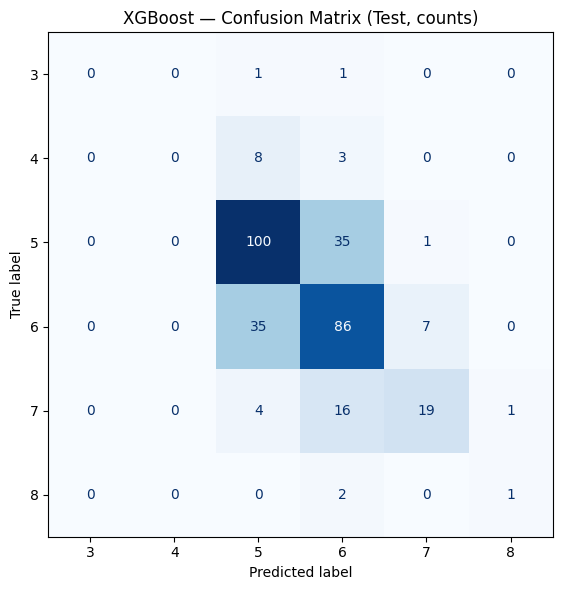

In [18]:
# based on results from xgboost evaluation 
#we create a confussion matrix to better understand the data and their effects on model 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


y_test_true = L_Encdr.inverse_transform(y_test_enc)
y_pred_true = L_Encdr.inverse_transform(y_pred)
labels = L_Encdr.classes_          

cm = confusion_matrix(y_test_true, y_pred_true, labels=labels)

fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", colorbar=False, values_format="d", ax=ax)

ax.set_title("XGBoost — Confusion Matrix (Test, counts)")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



<span style="color:yellow; font-weight:bold;">
Documentation
</span>


In [19]:
# saving the confusion matrix in a pdf format for later use and analysis 
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Convert encoded labels back to original class labels
y_test_true = L_Encdr.inverse_transform(y_test_enc)   # e.g. 3,4,5,6,7,8
y_pred_true = L_Encdr.inverse_transform(y_pred)       # same space

#  Use original class labels for both confusion_matrix and display
labels = L_Encdr.classes_                             # array of original labels
display_names = [str(c) for c in labels]

#  Compute confusion matrices (counts and row-normalized)
cm = confusion_matrix(y_test_true, y_pred_true, labels=labels)
cm_norm = confusion_matrix(y_test_true, y_pred_true,
                           labels=labels, normalize="true")

#  Ensure output directories exist
os.makedirs("outputs/figs", exist_ok=True)
os.makedirs("outputs/logs", exist_ok=True)

#  Save matrices as CSV
pd.DataFrame(cm, index=display_names, columns=display_names).to_csv(
    "outputs/logs/confusion_matrix_counts.csv"
)
pd.DataFrame(cm_norm, index=display_names, columns=display_names).to_csv(
    "outputs/logs/confusion_matrix_row_normalized.csv"
)

#  Plot and save counts confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_names)
disp.plot(cmap="Blues", colorbar=False, values_format="d", ax=ax)
ax.set_title("XGBoost — Confusion Matrix (counts)")
plt.tight_layout()
plt.savefig("outputs/figs/confusion_matrix_counts.png", dpi=150)
plt.close(fig)

#  Plot and save normalized confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=display_names)
disp.plot(cmap="Blues", colorbar=True, values_format=".2f", ax=ax)
ax.set_title("XGBoost — Confusion Matrix (row-normalized)")
plt.tight_layout()
plt.savefig("outputs/figs/confusion_matrix_row_norm.png", dpi=150)
plt.close(fig)

print("Saved CSVs to outputs/logs/ and PNGs to outputs/figs/")


Saved CSVs to outputs/logs/ and PNGs to outputs/figs/


In [20]:
%pip uninstall -y numpy
%pip install numpy==2.3.1


Found existing installation: numpy 2.3.1
Uninstalling numpy-2.3.1:
  Successfully uninstalled numpy-2.3.1
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
You can safely remove it manually.


  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl (12.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
# applying shap for basic understanding 
!pip install shap
import  numpy as np
import shap

bg_n = min(200, X_train_pre_norm.shape[0])
background = X_train_pre_norm[:bg_n]

# Predict-proba function using our booster
def predict_proba_fn(X):
    dm = xgb.DMatrix(X)
    return model.predict(dm)  

explainer = shap.KernelExplainer(predict_proba_fn, background)



X_sample = X_test_pre_norm[:200]  
shap_values = explainer.shap_values(X_sample)

feature_names = getattr(pre_xgb, "get_feature_names_out", lambda: None)()



Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

<span style="color:yellow; font-weight:bold;">
Documentation of SHAP
</span>


In [22]:
import os
import numpy as np
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# configuration of our saved directory
SAVE_DIR = "outputs/shap"
os.makedirs(SAVE_DIR, exist_ok=True)

# using k-means clustering on trained data
K_BG = 50
background = shap.kmeans(X_train_pre_norm, K_BG)




# Predict function
def predict_proba_fn(X):
    dm =  xgb.DMatrix(X)
    return model.predict(dm)

# Build explainer 
explainer = shap.KernelExplainer(predict_proba_fn, background)

# Limit number of test samples for faster interpretation of the model this case XGB
N_EXPLAIN = min(200, X_test_pre_norm.shape[0])
X_sample = X_test_pre_norm[:N_EXPLAIN]

# computing shap values 
raw_sv = explainer.shap_values(X_sample)

#  Normalize format: ensure list-of-arrays per class 
def to_list_per_class(raw, X_ref):
    arr = np.asarray(raw)
    n, f =X_ref.shape
    if isinstance(raw, list):
        return raw
    if arr.ndim == 2:
        return [arr, -arr]  
    if arr.ndim == 3:
        if arr.shape == (n, f, arr.shape[2]):  
            return [arr[:, :, c] for c in range(arr.shape[2])]
        if arr.shape == (arr.shape[0], n, f):  
            return [arr[c, :, :] for c in range(arr.shape[0])]
        if arr.shape == (n, arr.shape[1], f):  
            return [arr[:, c, :] for c in range(arr.shape[1])]
    raise RuntimeError(f"Unhandled SHAP shape: {arr.shape}")

shap_values_list = to_list_per_class(raw_sv, X_sample)








# --- Metadata ---
feature_names = getattr(pre_xgb, "get_feature_names_out", lambda: None)()
if feature_names is None:
    feature_names = [f"f{i}" for i in range(X_sample.shape[1])]

if hasattr(model, "classes_"):
    class_names = [str(c) for c in model.classes_]
else:
    class_names = [f"class {i}" for i in range(len(shap_values_list))]



#   saveing plots in given path
def save_current_plot(filename):
    path = os.path.join(SAVE_DIR, filename)
    plt.tight_layout()
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print(f"Saved: {path}")










#  per-class SHAP plots
for k, sv in enumerate(shap_values_list):
    print(f"Plotting class {class_names[k]} …")
    shap.summary_plot(
        sv, X_sample, feature_names=feature_names,
        plot_type="dot", max_display=15, show=False
    )
    save_current_plot(f"shap_beeswarm_class_{class_names[k]}.png")
    plt.close()

#  global bar plot: mean(|SHAP|) across classes 
abs_means_across_classes = np.mean([np.abs(sv) for sv in shap_values_list], axis=0)
shap.summary_plot(
    abs_means_across_classes, X_sample,
    feature_names=feature_names, plot_type="bar",
    max_display=15, show=False
)
save_current_plot("shap_global_importance_bar.png")
plt.close()


#  pooled signed SHAP 
pooled_signed = np.mean(np.stack(shap_values_list, axis=2), axis=2)
shap.summary_plot(
    pooled_signed, X_sample,
    feature_names=feature_names, plot_type="dot",
    max_display=15, show=False
)
save_current_plot("shap_pooled_signed_beeswarm.png")
plt.close()



print(f"\n All SHAP plots saved under: {os.path.abspath(SAVE_DIR)}")

  0%|          | 0/200 [00:00<?, ?it/s]

Plotting class class 0 …
Saved: outputs/shap\shap_beeswarm_class_class 0.png
Plotting class class 1 …
Saved: outputs/shap\shap_beeswarm_class_class 1.png
Plotting class class 2 …
Saved: outputs/shap\shap_beeswarm_class_class 2.png
Plotting class class 3 …
Saved: outputs/shap\shap_beeswarm_class_class 3.png
Plotting class class 4 …
Saved: outputs/shap\shap_beeswarm_class_class 4.png
Plotting class class 5 …
Saved: outputs/shap\shap_beeswarm_class_class 5.png
Saved: outputs/shap\shap_global_importance_bar.png
Saved: outputs/shap\shap_pooled_signed_beeswarm.png

 All SHAP plots saved under: d:\red wine project\outputs\shap


In [23]:
# performing a sanity check on xgboost baseline 
for k_bg in [30,50,80]: 
    bg = shap.kmeans(X_train_pre_norm,k_bg)
    explain = shap.KernelExplainer(predict_proba_fn,bg)
    shap_value= explain.shap_values(X_sample)
    sv_list= to_list_per_class(sv,X_sample)
    abs_means=np.mean([np.abs(s) for s in sv_list], axis=0).mean(axis=0)
    ranking = np.argsort(abs_means)[::-1][:10]
    print(f"K_GB={k_bg} => top 5 : " , [feature_names[i] for i in ranking[:5]])

  0%|          | 0/200 [00:00<?, ?it/s]

K_GB=30 => top 5 :  ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'citric acid']


  0%|          | 0/200 [00:00<?, ?it/s]

K_GB=50 => top 5 :  ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'citric acid']


  0%|          | 0/200 [00:00<?, ?it/s]

K_GB=80 => top 5 :  ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'citric acid']


In [24]:
#!pip install reportlab

<span style="color:blue; font-weight:bold;">
Interpretability PDP AND ICE

</span>


In [25]:

#  PDP and ICE PDF REPORT 


%pip -q install reportlab

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer, PageBreak
from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet

SAVE_DIR = "outputs/pdp_ice_report"
os.makedirs(SAVE_DIR, exist_ok=True)
PDF_PATH = os.path.join(SAVE_DIR, "PDP_ICE_Report.pdf")

SUBSAMPLE = 600        # ICE can be heavy; 300-1000 is reasonable
GRID_RES = 30
TOP_K = 5
CLASSES_TO_PLOT = None  # None = all classes, or e.g. [0,1,2]
SEED = 42

styles = getSampleStyleSheet()
rng = np.random.default_rng(SEED)



if "X_test_pre_norm" in globals():
    X = X_test_pre_norm
elif "X_test_sc" in globals():
    X = X_test_sc
elif "X_test" in globals():
    X = X_test
else:
    raise NameError("Define X_test_pre_norm or X_test_sc or X_test (must match training space).")

#  DataFrame with names for safe column handling
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X, columns=feature_names)
else:
    X = X.copy()
    if hasattr(X, "columns") and len(X.columns) == len(feature_names):
        X.columns = feature_names

# subsample for speed
if SUBSAMPLE and SUBSAMPLE < len(X):
    idx = rng.choice(len(X), size=SUBSAMPLE, replace=False)
    X_use = X.iloc[idx].copy()
else:
    X_use = X.copy()


# Select estimator and prediction function


predict_proba_fn = None
classes_ = None

# Try sklearn wrapper first
if "xgb_clf" in globals() and hasattr(xgb_clf, "predict_proba"):
    est = xgb_clf
    predict_proba_fn = lambda Xdf: est.predict_proba(Xdf)
    classes_ = getattr(est, "classes_", None)

# Otherwise try a raw booster named "booster" or "model"
elif "booster" in globals():
    import xgboost as xgb
    est = booster
    predict_proba_fn = lambda Xdf: est.predict(xgb.DMatrix(Xdf.values))
elif "model" in globals():
    import xgboost as xgb
    est = model
    # model might be booster or wrapper
    if hasattr(est, "predict_proba"):
        predict_proba_fn = lambda Xdf: est.predict_proba(Xdf)
        classes_ = getattr(est, "classes_", None)
    else:
        predict_proba_fn = lambda Xdf: est.predict(xgb.DMatrix(Xdf.values))
else:
    raise NameError("Couldn't find xgb_clf, booster, or model. Provide your fitted XGBoost model.")

# quick probe to infer n_classes
proba_probe = predict_proba_fn(X_use.iloc[:5])
proba_probe = np.asarray(proba_probe)
if proba_probe.ndim == 1:
    # binary sometimes returns (n,) for positive class prob; convert to (n,2)
    proba_probe = np.column_stack([1 - proba_probe, proba_probe])
n_classes = proba_probe.shape[1]

if CLASSES_TO_PLOT is None:
    class_indices = list(range(n_classes))
else:
    class_indices = list(CLASSES_TO_PLOT)




sv = np.array(shap_values_list)
if sv.ndim != 3:
    raise ValueError(f"shap_values_list must be (n_classes,n_samples,n_features). Got {sv.shape}")

abs_means = np.mean(np.abs(sv), axis=1).mean(axis=0)  # (n_features,)
top_idx = np.argsort(abs_means)[::-1][:TOP_K]
top_names = [feature_names[i] for i in top_idx]
print("Top SHAP features:", top_names)



def safe_name(s: str) -> str:
    return s.replace(" ", "_").replace("/", "_").replace("\\", "_").replace(":", "_")

def save_plot(path, title):
    plt.title(title)
    plt.tight_layout()
    plt.savefig(path, dpi=300, bbox_inches="tight")
    plt.close()

def compute_pdp_ice_1d(Xdf, feature, grid, class_idx):
    """
    Returns:
      pdp: (len(grid),)
      ice: (n_samples, len(grid))  [may be large]
    """
    X_work = Xdf.copy()
    n = len(X_work)
    ice = np.zeros((n, len(grid)), dtype=float)

    for j, val in enumerate(grid):
        X_work[feature] = val
        proba = np.asarray(predict_proba_fn(X_work))
        if proba.ndim == 1:
            proba = np.column_stack([1 - proba, proba])
        ice[:, j] = proba[:, class_idx]

    pdp = ice.mean(axis=0)
    return pdp, ice


# Generate plots

img_paths = []

for f_idx in top_idx:
    feat = feature_names[f_idx]
    xcol = X_use[feat].astype(float)

    # build grid: percentiles to avoid extreme outliers
    lo, hi = np.nanpercentile(xcol, 1), np.nanpercentile(xcol, 99)
    grid = np.linspace(lo, hi, GRID_RES)

    for c in class_indices:
        pdp, ice = compute_pdp_ice_1d(X_use, feat, grid, c)

        # plot: ICE lines (subset) + PDP thick line
        plt.figure(figsize=(7.5, 4.8))

        # plot only a subset of ICE lines to keep figure readable
        n_lines = min(80, len(X_use))
        pick = rng.choice(len(X_use), size=n_lines, replace=False)
        for i in pick:
            plt.plot(grid, ice[i, :], alpha=0.15, linewidth=0.8)

        plt.plot(grid, pdp, linewidth=2.5)

        class_label = None
        if classes_ is not None and len(classes_) == n_classes:
            class_label = str(classes_[c])
        else:
            class_label = str(c)

        title = f"PDP + ICE — {feat} (class {class_label})"
        out_path = os.path.join(SAVE_DIR, f"pdp_ice_{safe_name(feat)}_class{class_label}.png")
        save_plot(out_path, title)
        img_paths.append((title, out_path))

# PDF report

print("Building PDF report...")

doc = SimpleDocTemplate(PDF_PATH, pagesize=A4)
story = [
    Paragraph("<b>PDP & ICE Report</b>", styles["Title"]),
    Spacer(1, 12),
    Paragraph(
        f"This report includes manually computed 1D Partial Dependence (PDP) and Individual Conditional Expectation (ICE) "
        f"plots for the top {TOP_K} SHAP features. ICE curves are plotted for a subset of samples for readability; PDP is "
        f"the average across samples. Data used: {len(X_use)} samples, grid resolution: {GRID_RES}.",
        styles["Normal"]
    ),
    PageBreak(),
]

for title, path in img_paths:
    story.append(Paragraph(f"<b>{title}</b>", styles["Heading2"]))
    story.append(Spacer(1, 6))
    story.append(Image(path, width=500, height=350))
    story.append(Spacer(1, 12))

doc.build(story)

print("Done ")
print(f"Saved to:\n{os.path.abspath(PDF_PATH)}")


Note: you may need to restart the kernel to use updated packages.
Top SHAP features: ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'citric acid']
Building PDF report...
Done 
Saved to:
d:\red wine project\outputs\pdp_ice_report\PDP_ICE_Report.pdf


<span style="color:yellow; font-weight:bold;">
 XGBOOST, waterfal shap for fast interpretability 

</span>


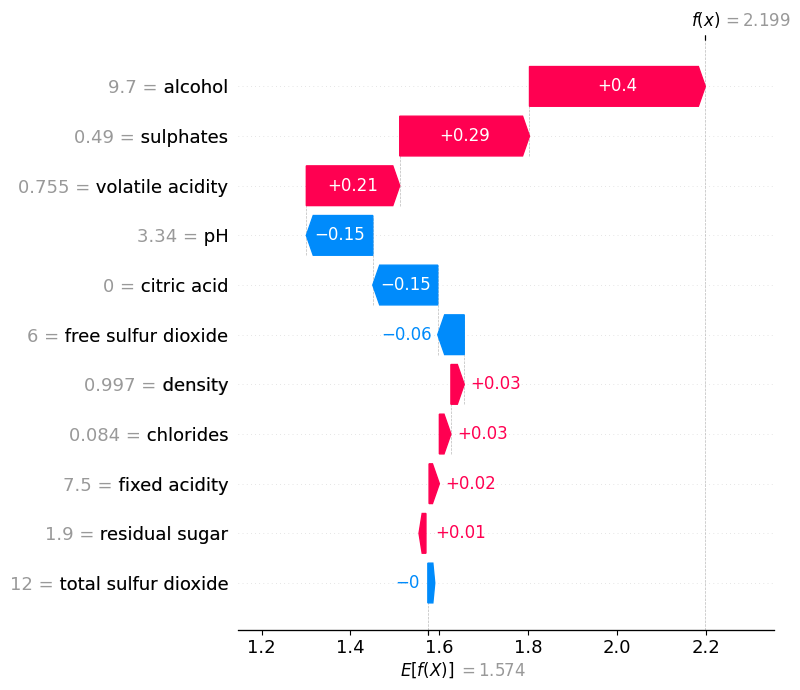

Predicted class: 5 (id=2)
Saved: outputs/shap\waterfall_idx0_class2.png and outputs/shap\waterfall_idx0_class2.pdf


In [26]:
# SHAP Waterfall for XGBoost (Multiclass) 
import numpy as np, ast, json, os
import shap, matplotlib.pyplot as plt
import xgboost as xgb


idx = 0                 
max_display = 15        
bg_max = 200            
out_dir = "outputs/shap"
os.makedirs(out_dir, exist_ok=True)


def get_booster(m):
    """Return xgboost.Booster whether given a Booster or XGBClassifier."""
    return m if isinstance(m, xgb.Booster) else m.get_booster()

def patch_base_score(booster):
    """
    Fix XGBoost multiclass models where base_score is a stringified list.
    Try both set_attr and full JSON config patch.
    """
    patched = False
    bs = booster.attr("base_score")
    if bs and isinstance(bs, str) and bs.strip().startswith('['):
        try:
            vec = np.array(ast.literal_eval(bs), dtype=float)
            booster.set_attr(base_score=str(float(vec.mean())))
            patched = True
        except Exception:
            pass
    if not patched:
        try:
            cfg = json.loads(booster.save_config())
            bs = cfg["learner"]["learner_model_param"].get("base_score", None)
            if isinstance(bs, str) and bs.strip().startswith('['):
                vec = np.array(ast.literal_eval(bs), dtype=float)
                cfg["learner"]["learner_model_param"]["base_score"] = str(float(vec.mean()))
                booster.load_config(json.dumps(cfg))
                patched = True
        except Exception:
            pass
    return patched

def to_2d_numpy(X):
    """Convert DataFrame/array-like to 2D numpy array for DMatrix."""
    if hasattr(X, "values"):
        return X.values
    return np.asarray(X)

def get_row_1d(X, i):
    """Return i-th row as 1D array/Series for SHAP Explanation.data."""
    if hasattr(X, "iloc"):
        return X.iloc[i]          
    return np.asarray(X)[i]       

def get_rows_2d(X, slc):
    """Return row slice as 2D matrix for predict/explain."""
    if hasattr(X, "iloc"):
        return X.iloc[slc]
    return np.asarray(X)[slc]

def predict_proba_with_booster(booster, X):
    """Predict class probabilities with a Booster given 2D X (DataFrame or array)."""
    Xnp = to_2d_numpy(X)
    dm = xgb.DMatrix(Xnp)
    proba = booster.predict(dm)  # (n_samples, n_classes) for multi:softprob
    proba = np.asarray(proba)
    if proba.ndim == 1:
        proba = np.column_stack([1 - proba, proba])
    return proba

def pick_class_shap(shap_vals_all, expected_all, class_id, sample_index=0):
    """
    Normalize SHAP outputs to (sv, base) for the requested class and sample.
    Handles: list-of-arrays per class, 3D arrays in either order, 2D/1D outputs.
    """
    if isinstance(shap_vals_all, list):
        sv = np.asarray(shap_vals_all[class_id])[sample_index]
        base = (np.asarray(expected_all)[class_id]
                if isinstance(expected_all, (list, np.ndarray)) else expected_all)
        return sv, base

    arr = np.asarray(shap_vals_all)
    if arr.ndim == 3:
        # either (n_samples, n_features, n_classes) OR (n_classes, n_samples, n_features)
        # decide by matching last dim to number of classes
        if arr.shape[-1] > 1 and class_id < arr.shape[-1]:
            sv = arr[sample_index, :, class_id]
        else:
            sv = arr[class_id, sample_index, :]
        base = (np.asarray(expected_all)[class_id]
                if isinstance(expected_all, (list, np.ndarray)) else expected_all)
        return sv, base

    if arr.ndim == 2:
        sv = arr[sample_index]
        base = (np.asarray(expected_all)[class_id]
                if isinstance(expected_all, (list, np.ndarray)) else expected_all)
        return sv, base

    if arr.ndim == 1:
        sv = arr
        base = (np.asarray(expected_all)[class_id]
                if isinstance(expected_all, (list, np.ndarray)) else expected_all)
        return sv, base

    raise ValueError(f"Unhandled SHAP output with ndim={arr.ndim}")

# MAIN LOGIC 

#
# X_test_pre: test features (DataFrame or numpy array)
if "model" not in globals():
    raise NameError("Define `model` (your fitted XGBoost model) before running this cell.")
if "X_test_pre" not in globals():
    # fallback to your other common variables if present
    if "X_test_pre_norm" in globals():
        X_test_pre = X_test_pre_norm
    elif "X_test_sc" in globals():
        X_test_pre = X_test_sc
    elif "X_test" in globals():
        X_test_pre = X_test
    else:
        raise NameError("Define `X_test_pre` (or X_test_pre_norm / X_test_sc / X_test) before running this cell.")

#  Booster and patch base_score
booster = get_booster(model)
_ = patch_base_score(booster)

#  Probabilities and predicted class for the chosen row
try:
    proba = predict_proba_with_booster(booster, X_test_pre)
except Exception:
    # sklearn wrapper fallback
    proba = np.asarray(model.predict_proba(X_test_pre))
    if proba.ndim == 1:
        proba = np.column_stack([1 - proba, proba])

class_id = int(np.argmax(proba[idx]))  # predicted class for sample idx

#  SHAP: TreeExplainer first, KernelExplainer fallback
use_kernel = False
try:
    explainer = shap.TreeExplainer(booster)
    shap_vals_all = explainer.shap_values(get_rows_2d(X_test_pre, slice(idx, idx+1)))
    expected_all  = explainer.expected_value
except Exception as e_tree:
    print("TreeExplainer failed, falling back to KernelExplainer. Reason:", e_tree)
    use_kernel = True

if use_kernel:
    if "X_train_pre_norm" in globals():
        X_train_bg = X_train_pre_norm
    elif "X_train_sc" in globals():
        X_train_bg = X_train_sc
    elif "X_train" in globals():
        X_train_bg = X_train
    else:
        raise NameError("KernelExplainer fallback needs X_train_pre_norm (or X_train_sc / X_train) for background.")
    bg_n = min(bg_max, len(X_train_bg))
    background = get_rows_2d(X_train_bg, slice(0, bg_n))

    def predict_proba_fn(X):
        return predict_proba_with_booster(booster, X)

    kexp = shap.KernelExplainer(predict_proba_fn, background)
    shap_vals_all = kexp.shap_values(get_rows_2d(X_test_pre, slice(idx, idx+1)))
    expected_all  = kexp.expected_value

# 4) Extract class-specific SHAP vector + base value for the selected sample
sv, base = pick_class_shap(shap_vals_all, expected_all, class_id, sample_index=0)

# 5) Feature names and row data
# Prefer DataFrame columns if available
if hasattr(X_test_pre, "columns"):
    feature_names = list(X_test_pre.columns)
else:
    try:
        feature_names = list(pre_xgb.get_feature_names_out())
    except Exception:
        feature_names = [f"f{i}" for i in range(len(sv))]

row_1d = get_row_1d(X_test_pre, idx)
row_np = np.asarray(row_1d, dtype=float)

exp = shap.Explanation(
    values=sv,
    base_values=base,
    data=row_np,
    feature_names=feature_names
)

#  Waterfall plot + save PNG and PDF
plt.figure(figsize=(10, 7))
shap.plots.waterfall(exp, max_display=max_display, show=False)
plt.tight_layout()
png_path = os.path.join(out_dir, f"waterfall_idx{idx}_class{class_id}.png")
pdf_path = os.path.join(out_dir, f"waterfall_idx{idx}_class{class_id}.pdf")
plt.savefig(png_path, dpi=300, bbox_inches="tight")
plt.savefig(pdf_path, bbox_inches="tight")
plt.show()

#  label printout 
try:
    human_label = L_Encdr.inverse_transform([class_id])[0]
    print(f"Predicted class: {human_label} (id={class_id})")
except Exception:
    print(f"Predicted class id: {class_id}")

print(f"Saved: {png_path} and {pdf_path}")


In [27]:
print("Sample alcohol:", X_test.iloc[idx]['alcohol'])
print("Dataset mean alcohol:", df['alcohol'].mean())

Sample alcohol: 9.7
Dataset mean alcohol: 10.422983114446529


In [ ]:
# now lets test with different train test split size 
# 80/10/10 train / test / validation
X_train , X_temp , y_train , y_temp = train_test_split(X,Y,test_size=0.20,random_state=SEED,stratify=Y)
X_val , X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.50,random_state=SEED,stratify=y_temp)
len(X_train),len(X_val),len(X_test)
############
from sklearn.pipeline import Pipeline
pre_xgb = build_preprocessors()['xgb']
X_train_pre_norm = pre_xgb.fit_transform(X_train)
X_val_pre_norm = pre_xgb.transform(X_val)
X_test_pre = pre_xgb.transform(X_test)
from sklearn.preprocessing import LabelEncoder

L_Encdr = LabelEncoder()
y_train_enc = L_Encdr.fit_transform(y_train)
y_val_enc = L_Encdr.transform(y_val)
y_test_enc = L_Encdr.transform(y_test)
dtrain = xgb.DMatrix(X_train_pre_norm, label=y_train_enc)
dval = xgb.DMatrix(X_val_pre_norm, label=y_val_enc)


params = {
    'objective': 'multi:softprob',
    'num_class': len(classes),
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1.0,
    'seed': SEED
}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dval, 'validation')],
    early_stopping_rounds=50,
    verbose_eval=False
)
##################
from sklearn.metrics import classification_report 
labels_enc = np.arange(len(L_Encdr.classes_))
target_names=[str(c) for c in L_Encdr.classes_]
# prediction set
dtest = xgb.DMatrix(X_test_pre,label=y_test_enc)
probs = model.predict(dtest)
y_pred = np.argmax(probs,axis=1)
# Evaluation Metrics
acc = accuracy_score(y_test_enc,y_pred)
f1_macro = f1_score(y_test_enc,y_pred,average='macro')
f1_weighted=f1_score(y_test_enc,y_pred,average='weighted')
ll=log_loss(y_test_enc,probs,labels=np.arange(len(classes)))
print(f"Accuracy: {acc:.4f}")
print(f"F1 (macro): {f1_macro:.4f}")
print(f"F1 (weighted): {f1_weighted:.4f}")
print(f"Log-loss: {ll:.4f}\n")

print(classification_report(
    y_test_enc, y_pred,
    labels=labels_enc,
    target_names=target_names,
    digits=4,
    zero_division=0
))


In [29]:




import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


print("=== CURRENT OBJECTS ===")
print("X ->", type(X), "shape:", getattr(X, "shape", None), "len:", len(X))
print("Y ->", type(Y), "shape:", getattr(Y, "shape", None), "len:", len(Y))


rebuilt = False
if "df" in globals() and isinstance(df, pd.DataFrame):
   
    for target_col in ["quality", "target", "label", "y"]:
        if target_col in df.columns:
            X = df.drop(columns=[target_col])
            Y = df[target_col]
            rebuilt = True
            print(f"\n Rebuilt X,Y from df using target column: '{target_col}'")
            break


if not rebuilt:
    if isinstance(X, (pd.DataFrame, pd.Series)) and isinstance(Y, (pd.Series, pd.DataFrame)):
        # Align rows by shared index (prevents mismatched row deletions)
        X, Y = X.align(Y, join="inner", axis=0)
        rebuilt = True
        print("\n Aligned X and Y by index (inner join).")


if len(X) != len(Y):
    raise ValueError(
        f" Still inconsistent lengths after fixes: len(X)={len(X)} vs len(Y)={len(Y)}.\n"
        "Most likely you overwrote X or Y earlier (e.g., X became a feature list or grouped table).\n"
        "Fix by rebuilding from your original dataframe:\n"
        "    X = df.drop(columns=['quality'])\n"
        "    Y = df['quality']\n"
        "Then rerun."
    )

print("\n=== FIXED OBJECTS ===")
print("X ->", type(X), "shape:", getattr(X, "shape", None), "len:", len(X))
print("Y ->", type(Y), "shape:", getattr(Y, "shape", None), "len:", len(Y))


SEED = globals().get("SEED", 42)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, Y, test_size=0.20, random_state=SEED, stratify=Y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)

print("\n Split sizes:")
print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# Optional: quick class distribution check
print("\nClass distribution (Train/Val/Test):")
print("Train:\n", pd.Series(y_train).value_counts(normalize=True).sort_index())
print("Val:\n",   pd.Series(y_val).value_counts(normalize=True).sort_index())
print("Test:\n",  pd.Series(y_test).value_counts(normalize=True).sort_index())


=== CURRENT OBJECTS ===
X -> <class 'pandas.core.frame.DataFrame'> shape: (320, 11) len: 320
Y -> <class 'numpy.ndarray'> shape: (1599,) len: 1599

 Rebuilt X,Y from df using target column: 'quality'

=== FIXED OBJECTS ===
X -> <class 'pandas.core.frame.DataFrame'> shape: (1599, 11) len: 1599
Y -> <class 'pandas.core.series.Series'> shape: (1599,) len: 1599

 Split sizes:
Train: 1279 Val: 160 Test: 160

Class distribution (Train/Val/Test):
Train:
 quality
3    0.006255
4    0.032838
5    0.426114
6    0.398749
7    0.124316
8    0.011728
Name: proportion, dtype: float64
Val:
 quality
3    0.00625
4    0.03125
5    0.42500
6    0.40000
7    0.12500
8    0.01250
Name: proportion, dtype: float64
Test:
 quality
3    0.00625
4    0.03750
5    0.42500
6    0.40000
7    0.12500
8    0.00625
Name: proportion, dtype: float64


<span style="color:orange; font-weight:bold;">
XGBoost performance on Raw Data, train/test/eval 80/10/10
</span>




<span style="color:green; font-weight:bold;">
XGBOOST
switching train/test/eval to 80/10/10 , improved TABNET result by 9%
</span>

In [30]:

# 80/10/10 split


import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report

SEED = globals().get("SEED", 42)


if len(X) != len(Y):
    # try rebuild from df if possible
    if "df" in globals() and isinstance(df, pd.DataFrame) and "quality" in df.columns:
        X = df.drop(columns=["quality"])
        Y = df["quality"]
        print(" Rebuilt X,Y from df['quality']")
    elif isinstance(X, (pd.DataFrame, pd.Series)) and isinstance(Y, (pd.Series, pd.DataFrame)):
        X, Y = X.align(Y, join="inner", axis=0)
        print(" Aligned X,Y by index")
    else:
        raise ValueError(f"X and Y lengths differ: len(X)={len(X)} vs len(Y)={len(Y)}")

print("X len:", len(X), "| Y len:", len(Y))


X_train, X_temp, y_train, y_temp = train_test_split(
    X, Y, test_size=0.20, random_state=SEED, stratify=Y
)


temp_counts = pd.Series(y_temp).value_counts()
print("\nTemp class counts:\n", temp_counts.sort_index())

try:
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
    )
    print("\n Temp split stratified (val/test).")
except ValueError as e:
    print("\n Stratified val/test split failed due to rare class in y_temp.")
    print("Reason:", e)
    print(" Falling back to NON-stratified val/test split (still reproducible via SEED).")
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=None
    )

print("\nSplit sizes:")
print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

pre_xgb = build_preprocessors()['xgb']
X_train_pre_norm = pre_xgb.fit_transform(X_train)
X_val_pre_norm   = pre_xgb.transform(X_val)
X_test_pre       = pre_xgb.transform(X_test)

L_Encdr = LabelEncoder()
y_train_enc = L_Encdr.fit_transform(y_train)
y_val_enc   = L_Encdr.transform(y_val)
y_test_enc  = L_Encdr.transform(y_test)

num_class = len(L_Encdr.classes_)

dtrain = xgb.DMatrix(X_train_pre_norm, label=y_train_enc)
dval   = xgb.DMatrix(X_val_pre_norm,   label=y_val_enc)

params = {
    "objective": "multi:softprob",
    "num_class": num_class,
    "eval_metric": "mlogloss",
    "tree_method": "hist",
    "max_depth": 6,
    "eta": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,
    "seed": SEED
}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dval, "validation")],
    early_stopping_rounds=50,
    verbose_eval=False
)


dtest = xgb.DMatrix(X_test_pre, label=y_test_enc)
probs = model.predict(dtest)
y_pred = np.argmax(probs, axis=1)

acc = accuracy_score(y_test_enc, y_pred)
f1_macro = f1_score(y_test_enc, y_pred, average="macro")
f1_weighted = f1_score(y_test_enc, y_pred, average="weighted")
ll = log_loss(y_test_enc, probs, labels=np.arange(num_class))

print("\n=== Metrics ===")
print(f"Accuracy:      {acc:.4f}")
print(f"F1 (macro):    {f1_macro:.4f}")
print(f"F1 (weighted): {f1_weighted:.4f}")
print(f"Log-loss:      {ll:.4f}\n")

labels_enc = np.arange(num_class)
target_names = [str(c) for c in L_Encdr.classes_]

print(classification_report(
    y_test_enc, y_pred,
    labels=labels_enc,
    target_names=target_names,
    digits=4,
    zero_division=0
))


X len: 1599 | Y len: 1599

Temp class counts:
 quality
3      2
4     11
5    136
6    128
7     40
8      3
Name: count, dtype: int64

 Temp split stratified (val/test).

Split sizes:
Train: 1279 Val: 160 Test: 160

=== Metrics ===
Accuracy:      0.7188
F1 (macro):    0.4677
F1 (weighted): 0.7014
Log-loss:      0.7342

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         1
           4     0.0000    0.0000    0.0000         6
           5     0.7606    0.7941    0.7770        68
           6     0.6712    0.7656    0.7153        64
           7     0.7857    0.5500    0.6471        20
           8     0.5000    1.0000    0.6667         1

    accuracy                         0.7188       160
   macro avg     0.4529    0.5183    0.4677       160
weighted avg     0.6931    0.7188    0.7014       160



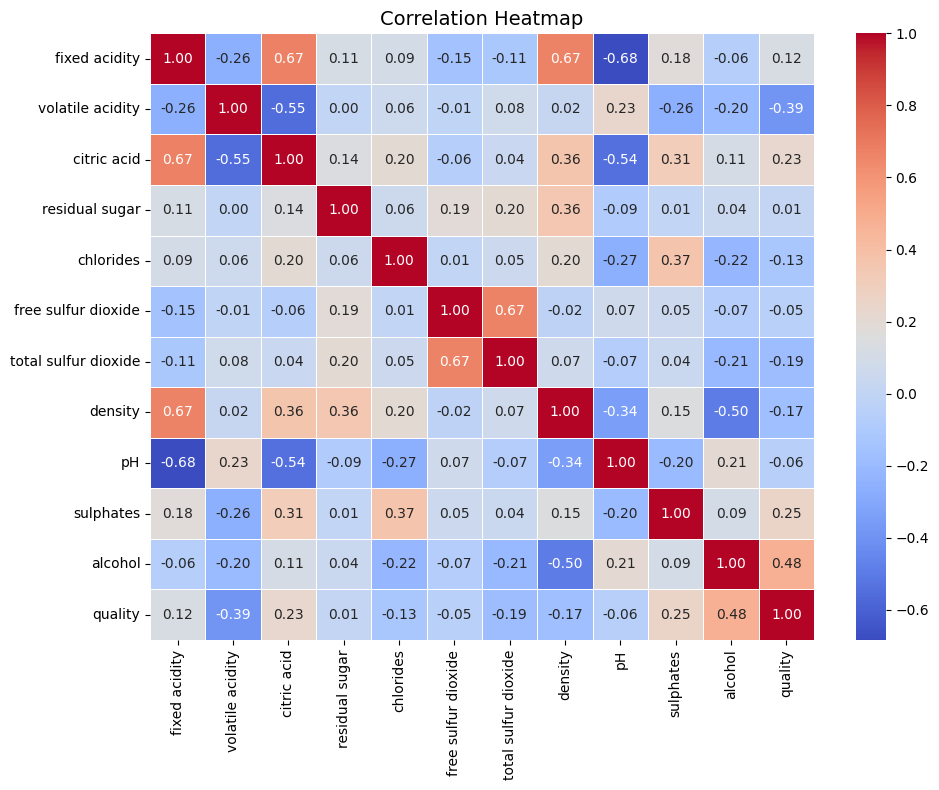

In [31]:
# lets plot a heatmap 
import matplotlib.pyplot as plt 
import seaborn as sns 
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap",fontsize=14)
plt.tight_layout()
plt.show()


In [32]:
df.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
quality                 0.217802
pH                      0.193683
density                 0.071288
dtype: float64

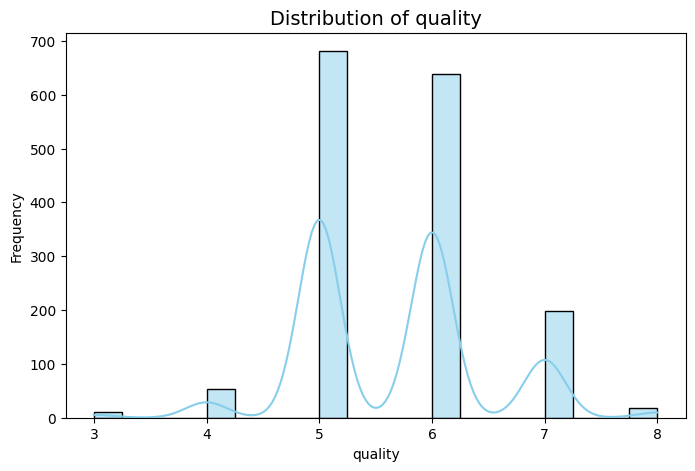

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['quality'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of quality", fontsize=14)
plt.xlabel("quality")
plt.ylabel("Frequency")
plt.show()

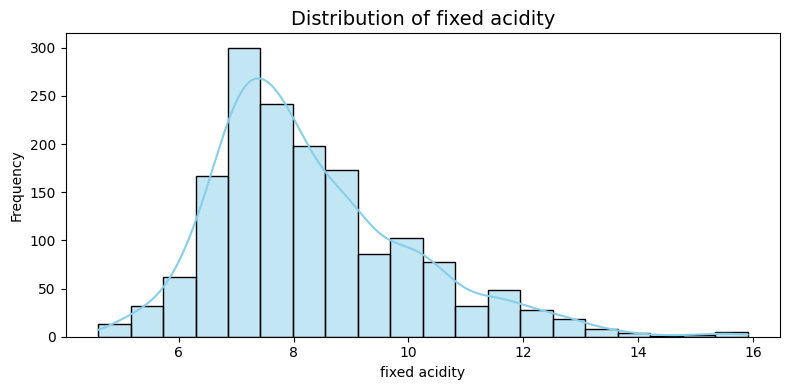

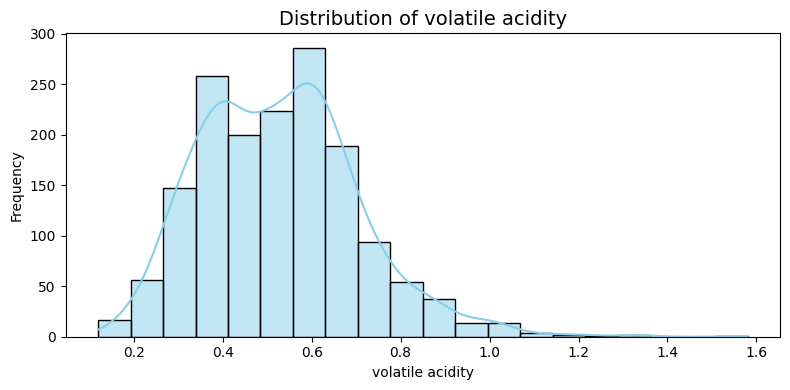

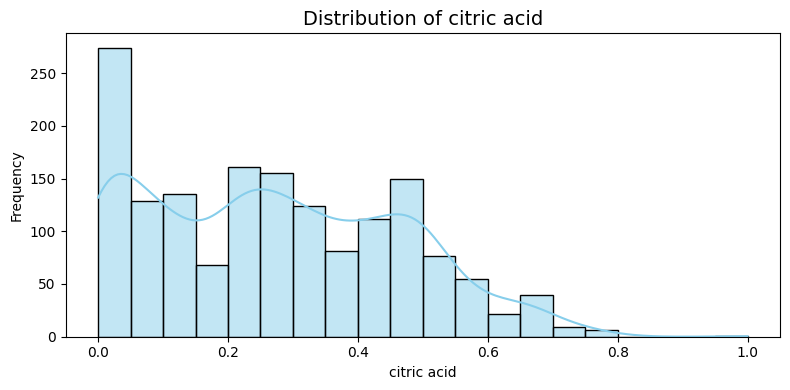

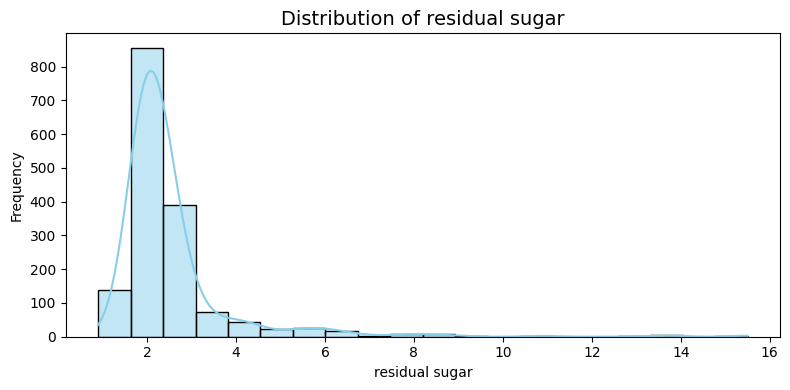

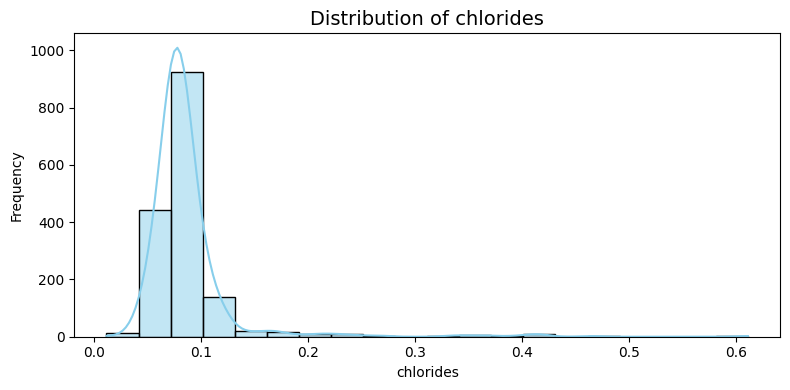

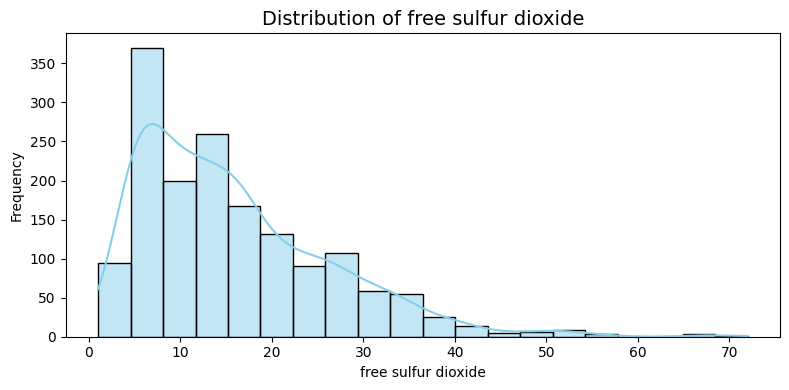

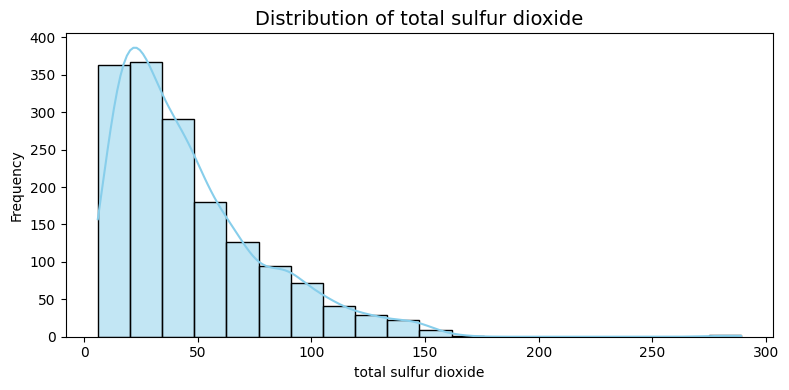

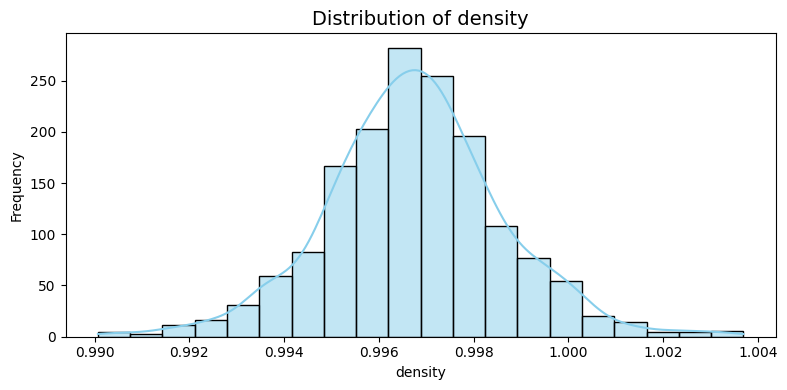

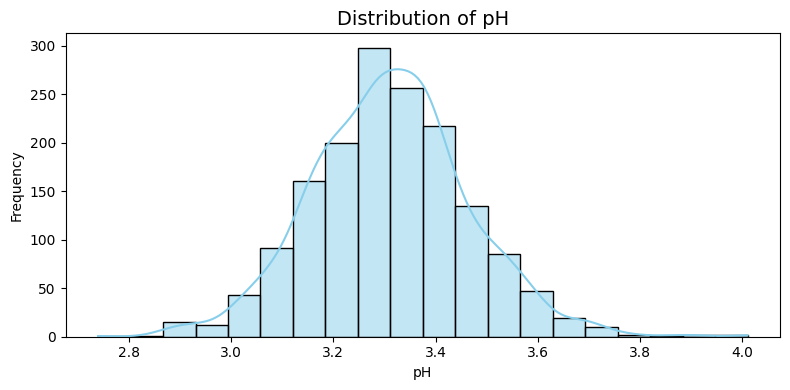

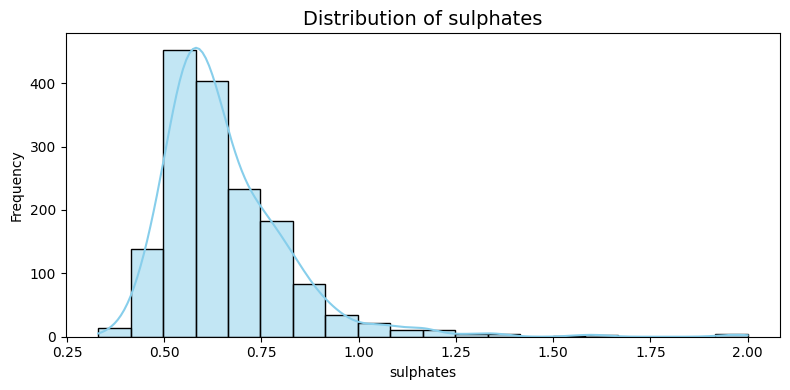

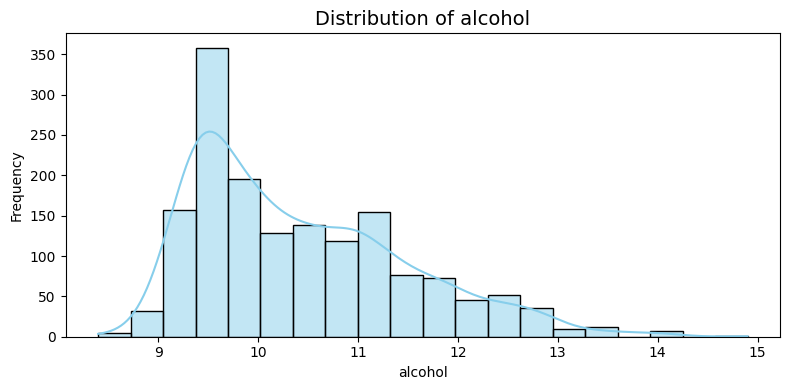

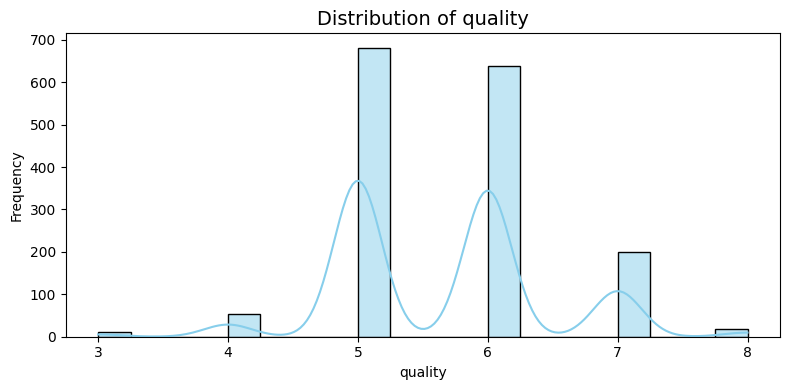

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each numeric column
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


<span style="color:orange; font-weight:bold;">
Case of TaBNet
</span>


In [35]:
print(df.shape)
print(df.columns.tolist())
print(df.info())
df.head()

(1599, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
!pip install pytorch-tabnet 
import numpy as np 
import torch 
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

In [37]:
X_train_tab = X_train.values.astype(np.float32)
X_val_tab = X_val.values.astype(np.float32)
X_test_tab = X_test.values.astype(np.float32)
le_tab = LabelEncoder()
y_train_tab = le_tab.fit_transform(y_train)
y_val_tab = le_tab.transform(y_val)
y_test_tab = le_tab.transform(y_test)
classes_tab = le_tab.classes_
print("Original classes: " , classes_tab)
print("X_train_tab:", X_train_tab.shape)
print("X_val_tab:  ", X_val_tab.shape)
print("X_test_tab: ", X_test_tab.shape)

print("y_train_tab shape:", y_train_tab.shape)
print("Unique y_train_tab:", np.unique(y_train_tab))
print("Class counts (train):", np.bincount(y_train_tab))


Original classes:  [3 4 5 6 7 8]
X_train_tab: (1279, 11)
X_val_tab:   (160, 11)
X_test_tab:  (160, 11)
y_train_tab shape: (1279,)
Unique y_train_tab: [0 1 2 3 4 5]
Class counts (train): [  8  42 545 510 159  15]


<span style="color:orange ; font-weight:bold;">



setting configurations for, TABNET model
</span>

In [38]:
tabnet_clf = TabNetClassifier(
    n_d=8,
    n_a=8,
    n_steps=3,
    gamma=1.3,
    n_independent=2,
    n_shared=2,
    lambda_sparse=1e-4, # less agr
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2), 
    mask_type="sparsemax",
    seed=SEED,
    verbose=10,
)
tabnet_clf.fit(
    X_train_tab, y_train_tab , 
    eval_set = [(X_train_tab,y_train_tab), (X_val_tab,y_val_tab)],
    eval_name=["train","valid"],
    eval_metric=["accuracy"], 
    max_epochs=300,
    patience=50,
    batch_size=256,
    virtual_batch_size=64,
    num_workers=0,
    drop_last=False,
    
)

d:\red wine project\.venv-gpu\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.58827 | train_accuracy: 0.03987 | valid_accuracy: 0.03125 |  0:00:01s
epoch 10 | loss: 1.00738 | train_accuracy: 0.39484 | valid_accuracy: 0.3875  |  0:00:04s
epoch 20 | loss: 0.93613 | train_accuracy: 0.30805 | valid_accuracy: 0.2875  |  0:00:08s
epoch 30 | loss: 0.90031 | train_accuracy: 0.34793 | valid_accuracy: 0.275   |  0:00:11s
epoch 40 | loss: 0.87882 | train_accuracy: 0.44175 | valid_accuracy: 0.4375  |  0:00:14s
epoch 50 | loss: 0.86218 | train_accuracy: 0.53557 | valid_accuracy: 0.49375 |  0:00:18s
epoch 60 | loss: 0.84465 | train_accuracy: 0.57467 | valid_accuracy: 0.5125  |  0:00:21s
epoch 70 | loss: 0.82701 | train_accuracy: 0.62783 | valid_accuracy: 0.5375  |  0:00:24s
epoch 80 | loss: 0.83322 | train_accuracy: 0.62236 | valid_accuracy: 0.49375 |  0:00:27s
epoch 90 | loss: 0.81337 | train_accuracy: 0.63878 | valid_accuracy: 0.525   |  0:00:30s
epoch 100| loss: 0.82059 | train_accuracy: 0.65442 | valid_accuracy: 0.50625 |  0:00:34s
epoch 110| loss: 0.79

d:\red wine project\.venv-gpu\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


<span style="color:orange; font-weight:bold;">
First Run TABNET over RAW data 59 % base set 

</span>


TabNet — Test Accuracy:      0.6625
TabNet — Test F1 (macro):    0.3216
TabNet — Test F1 (weighted): 0.6442

Classification report (original quality labels):
              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         1
           4     0.0000    0.0000    0.0000         6
           5     0.7797    0.6765    0.7244        68
           6     0.5862    0.7969    0.6755        64
           7     0.6429    0.4500    0.5294        20
           8     0.0000    0.0000    0.0000         1

    accuracy                         0.6625       160
   macro avg     0.3348    0.3206    0.3216       160
weighted avg     0.6462    0.6625    0.6442       160



<Figure size 600x600 with 0 Axes>

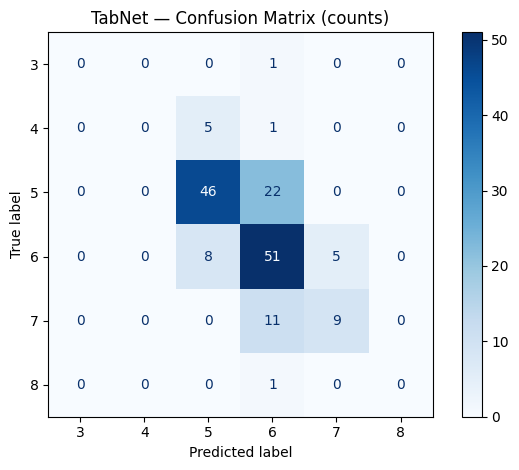

<Figure size 600x600 with 0 Axes>

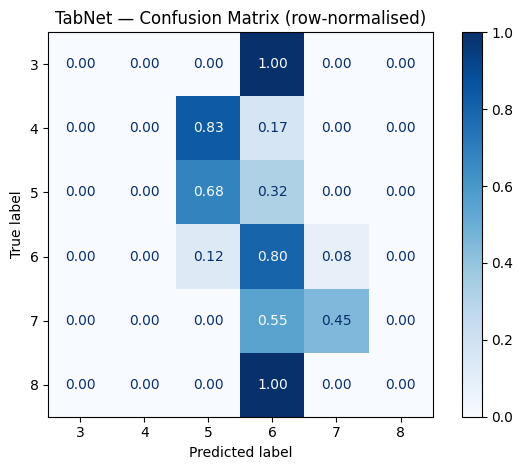

In [39]:
# --- Test evaluation for TabNet ---

# 1) Predict on test set (indices 0..5)
y_test_pred_tab_idx = tabnet_clf.predict(X_test_tab)

# 2) Map back to original quality labels [3,4,5,6,7,8]
y_test_pred_tab = le_tab.inverse_transform(y_test_pred_tab_idx)

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Metrics (using original labels for readability)
acc_tab = accuracy_score(y_test, y_test_pred_tab)
f1_macro_tab = f1_score(y_test, y_test_pred_tab, average="macro")
f1_weighted_tab = f1_score(y_test, y_test_pred_tab, average="weighted")

print(f"TabNet — Test Accuracy:      {acc_tab:.4f}")
print(f"TabNet — Test F1 (macro):    {f1_macro_tab:.4f}")
print(f"TabNet — Test F1 (weighted): {f1_weighted_tab:.4f}")

print("\nClassification report (original quality labels):")
print(classification_report(y_test, y_test_pred_tab, digits=4, zero_division=0))

# Confusion matrix
cm_tab = confusion_matrix(y_test, y_test_pred_tab, labels=classes_tab)
cm_tab_norm = cm_tab.astype("float") / cm_tab.sum(axis=1, keepdims=True)

plt.figure(figsize=(6,6))
ConfusionMatrixDisplay(confusion_matrix=cm_tab, display_labels=classes_tab).plot(
    cmap="Blues", colorbar=True
)
plt.title("TabNet — Confusion Matrix (counts)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
ConfusionMatrixDisplay(confusion_matrix=cm_tab_norm, display_labels=classes_tab).plot(
    cmap="Blues", colorbar=True, values_format=".2f"
)
plt.title("TabNet — Confusion Matrix (row-normalised)")
plt.tight_layout()
plt.show()


<span style="color:orange; font-weight:bold;">
Normalizing DATA for TABNET run 
</span>


In [40]:
# normalizing the dataset 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df.drop("quality",axis=1)
y=df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
df_original=df.copy()

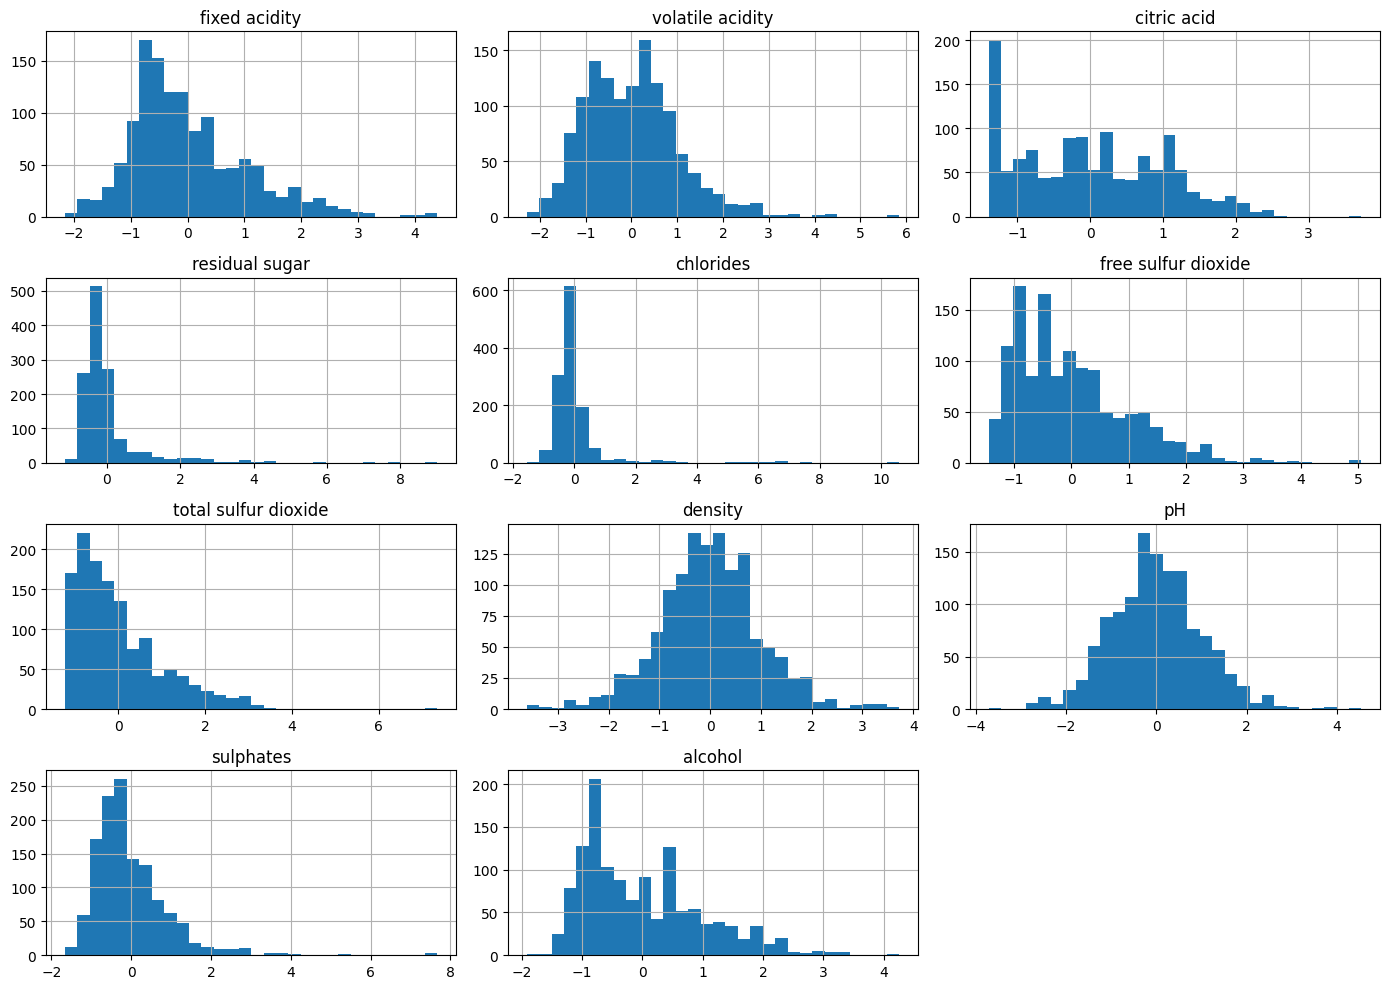

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
df_scaled=pd.DataFrame(X_train_scaled,columns=X.columns)
df_scaled.describe()
df_scaled.hist(bins=30,figsize=(14,10))
plt.tight_layout()
plt.show()

In [42]:
""" given we have some skewed data , being 
residual sugar, chlorides, total sulfur dioxide, sulphates 
we might want to apply np.log1p instead of np.log() since its safer when handling the outliers """

' given we have some skewed data , being \nresidual sugar, chlorides, total sulfur dioxide, sulphates \nwe might want to apply np.log1p instead of np.log() since its safer when handling the outliers '

In [43]:
skewed = ["residual sugar", "chlorides", "total sulfur dioxide", "sulphates"]
df[skewed]=df[skewed].apply(np.log1p)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_before_after(feature):
    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # Before
    sns.histplot(df_original[feature], kde=True, ax=axes[0])
    axes[0].set_title(f"{feature} — BEFORE log1p")

    # After
    sns.histplot(df[feature], kde=True, ax=axes[1])
    axes[1].set_title(f"{feature} — AFTER log1p")

    plt.tight_layout()
    plt.savefig(f"{feature}_before_after.pdf")
    plt.show()


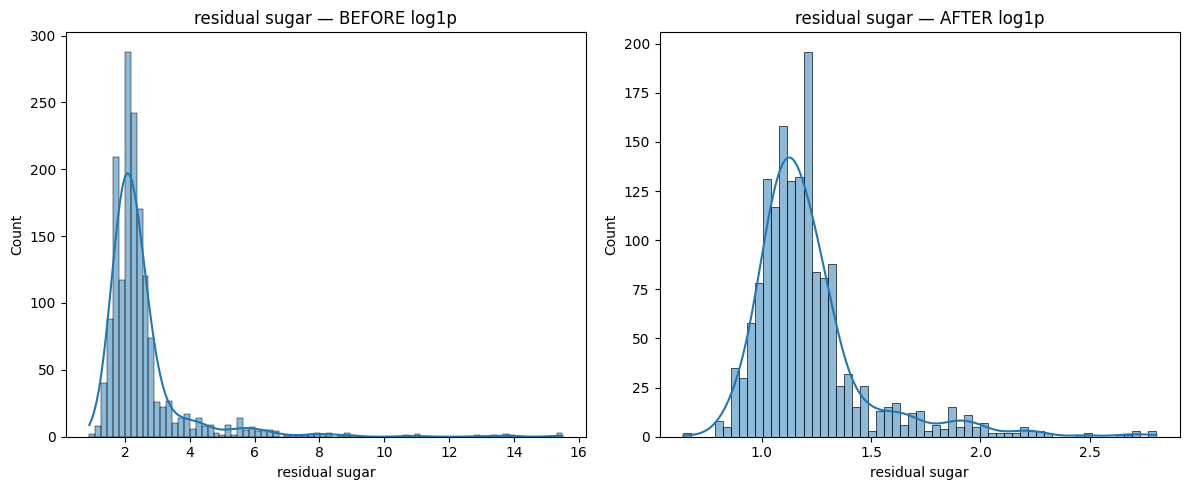

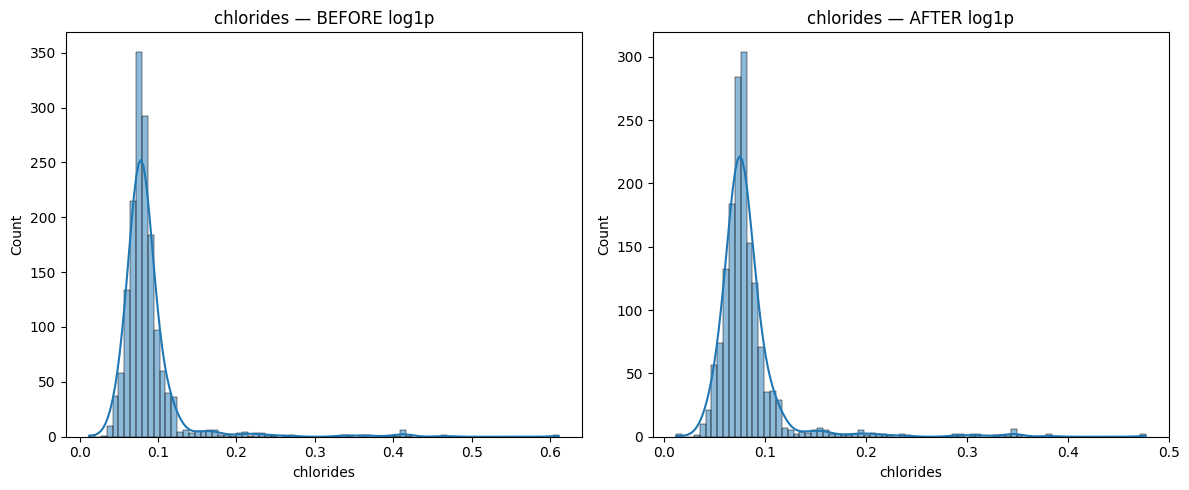

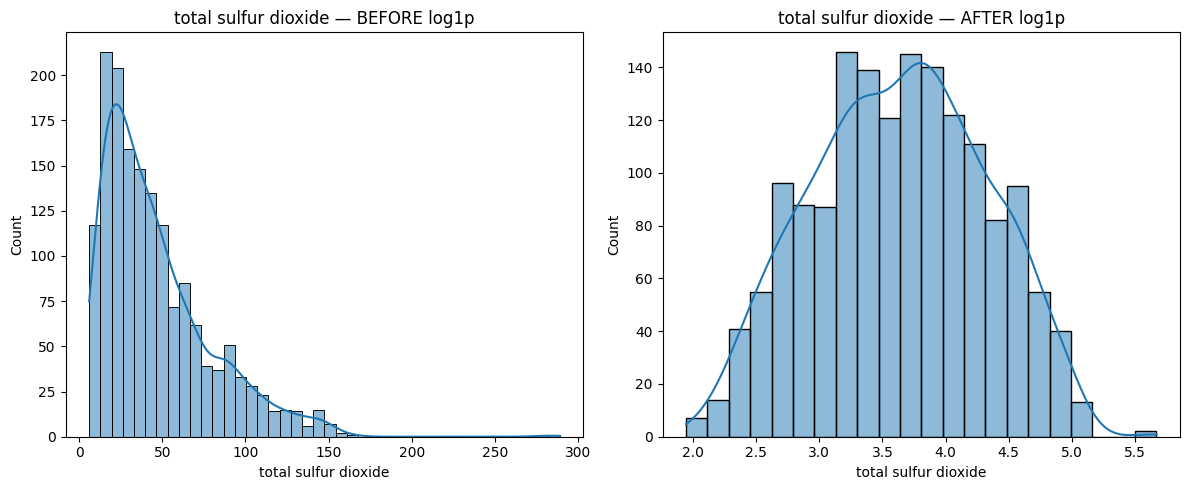

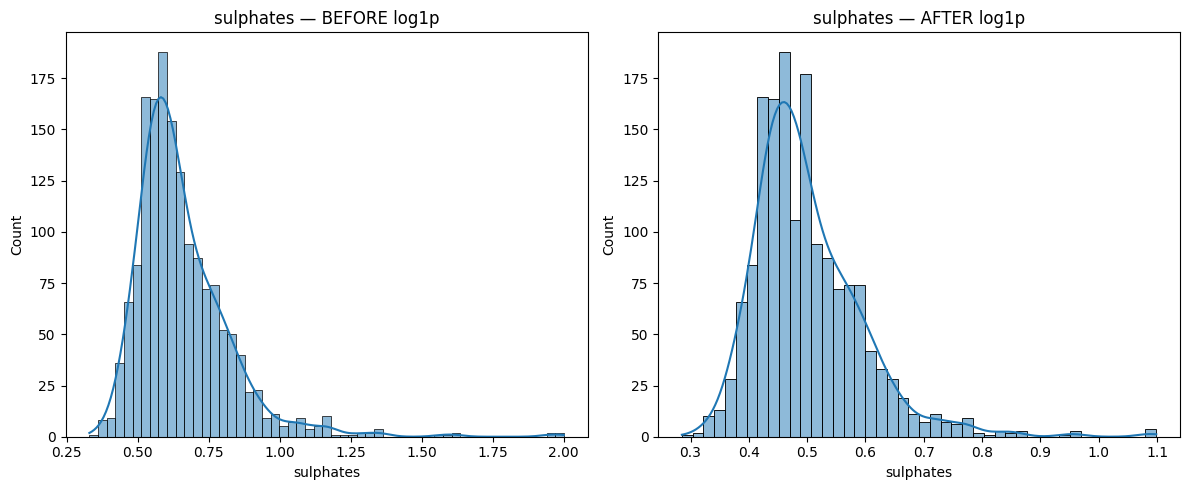

In [45]:
for feat in skewed:
    compare_before_after(feat)
 


In [46]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("all_skewed_plots.pdf") as pdf:
    for feature in skewed:
        fig, axes = plt.subplots(1, 2, figsize=(12,5))

        sns.histplot(df_original[feature], kde=True, ax=axes[0])
        axes[0].set_title(f"{feature} — BEFORE log1p")

        sns.histplot(df[feature], kde=True, ax=axes[1])
        axes[1].set_title(f"{feature} — AFTER log1p")

        plt.tight_layout()
        pdf.savefig(fig)   # saves the figure
        plt.close(fig)     # prevents memory buildup
print("Saved as all_skewed_plots.pdf ")

Saved as all_skewed_plots.pdf 


In [47]:
# normalizig data one more time 
from sklearn.model_selection import train_test_split
X= df.drop("quality",axis=1)
y=df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [49]:
from sklearn.preprocessing import LabelEncoder 
X_train_tab = X_train_scaled.astype(np.float32)
X_test_tab = X_test_scaled.astype(np.float32)
L_Encdr = LabelEncoder()
y_train_enc = L_Encdr.fit_transform(y_train)
y_test_enc = L_Encdr.transform(y_test)


In [50]:
tabnet_clf = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=4,
    gamma=1.5,
    lambda_sparse=1e-4, # less agr
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3), 
    mask_type="entmax",
)
tabnet_clf.fit(X_train_tab,y_train_enc,
               eval_set=[(X_train_tab,y_train_enc), (X_test_tab,y_test_enc)],
              eval_name=['train','valid'], 
              eval_metric =['accuracy'], 
              max_epochs=200,
              patience=20,
              batch_size=1024,
              virtual_batch_size=128,
              num_workers=0,drop_last=False)

d:\red wine project\.venv-gpu\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.30157 | train_accuracy: 0.30258 | valid_accuracy: 0.30312 |  0:00:00s
epoch 1  | loss: 2.23506 | train_accuracy: 0.30571 | valid_accuracy: 0.325   |  0:00:00s
epoch 2  | loss: 2.18378 | train_accuracy: 0.31196 | valid_accuracy: 0.29688 |  0:00:00s
epoch 3  | loss: 2.11226 | train_accuracy: 0.32447 | valid_accuracy: 0.31562 |  0:00:00s
epoch 4  | loss: 2.05496 | train_accuracy: 0.33385 | valid_accuracy: 0.31875 |  0:00:01s
epoch 5  | loss: 1.93307 | train_accuracy: 0.34402 | valid_accuracy: 0.3     |  0:00:01s
epoch 6  | loss: 1.93579 | train_accuracy: 0.35653 | valid_accuracy: 0.30938 |  0:00:01s
epoch 7  | loss: 1.89635 | train_accuracy: 0.362   | valid_accuracy: 0.31875 |  0:00:01s
epoch 8  | loss: 1.86275 | train_accuracy: 0.36747 | valid_accuracy: 0.33125 |  0:00:01s
epoch 9  | loss: 1.82045 | train_accuracy: 0.37608 | valid_accuracy: 0.34062 |  0:00:02s
epoch 10 | loss: 1.78406 | train_accuracy: 0.38389 | valid_accuracy: 0.34062 |  0:00:02s
epoch 11 | loss: 1.72

d:\red wine project\.venv-gpu\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


<span style="color:red; font-weight:bold;">
TABNET performance worsened about 5 % by use of log1p for data imbalance

</span>


In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Using the model you want to keep (e.g. the first one, or the second if you prefer)
y_pred_enc = tabnet_clf.predict(X_test_tab)
y_pred = L_Encdr.inverse_transform(y_pred_enc)   # back to 3,4,5,6,7,8

print("TabNet — Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


TabNet — Test Accuracy: 0.5375

Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.56      0.69      0.62       130
           6       0.52      0.51      0.51       132
           7       0.50      0.36      0.42        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.51      0.54      0.52       320


Confusion matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  6  3  1  0]
 [ 0  0 90 37  3  0]
 [ 0  0 56 67  9  0]
 [ 0  0  8 19 15  0]
 [ 0  0  0  3  2  0]]


d:\red wine project\.venv-gpu\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\red wine project\.venv-gpu\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\red wine project\.venv-gpu\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [52]:
tabnet_clf = TabNetClassifier(
    n_d= 8,
    n_a = 8,
    n_steps=3,
    gamma=1.3,
    n_independent=2,
    n_shared=2,
    lambda_sparse=1e-4,
optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type="sparsemax",
    seed=SEED,
    verbose=10,
)
tabnet_clf.fit(X_train_tab,y_train_enc,
               eval_set=[(X_train_tab,y_train_enc), (X_test_tab,y_test_enc)],
              eval_name=['train','valid'], 
              eval_metric =['accuracy'], 
              max_epochs=300,
              patience=50,
              batch_size=256,
              virtual_batch_size=64,
              num_workers=0,drop_last=False)

d:\red wine project\.venv-gpu\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.60428 | train_accuracy: 0.27365 | valid_accuracy: 0.26562 |  0:00:00s
epoch 10 | loss: 1.01526 | train_accuracy: 0.5645  | valid_accuracy: 0.51875 |  0:00:03s
epoch 20 | loss: 0.93716 | train_accuracy: 0.60907 | valid_accuracy: 0.54375 |  0:00:07s
epoch 30 | loss: 0.89911 | train_accuracy: 0.63174 | valid_accuracy: 0.56875 |  0:00:10s
epoch 40 | loss: 0.90079 | train_accuracy: 0.63409 | valid_accuracy: 0.6     |  0:00:14s
epoch 50 | loss: 0.86844 | train_accuracy: 0.6552  | valid_accuracy: 0.57812 |  0:00:17s
epoch 60 | loss: 0.85205 | train_accuracy: 0.67396 | valid_accuracy: 0.59062 |  0:00:20s
epoch 70 | loss: 0.82726 | train_accuracy: 0.681   | valid_accuracy: 0.58125 |  0:00:24s
epoch 80 | loss: 0.83765 | train_accuracy: 0.68647 | valid_accuracy: 0.58125 |  0:00:27s
epoch 90 | loss: 0.83374 | train_accuracy: 0.68647 | valid_accuracy: 0.57812 |  0:00:31s
epoch 100| loss: 0.78055 | train_accuracy: 0.67631 | valid_accuracy: 0.575   |  0:00:34s

Early stopping occur

d:\red wine project\.venv-gpu\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


<span style="color:green; font-weight:bold;">
TABNET
simple normalization applied, improve TABNET result by 6%
</span>


In [53]:


import numpy as np
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report


def to_2d_numpy(X):
    if hasattr(X, "to_numpy"):
        return X.to_numpy()
    return np.asarray(X)

for name in ["X_train", "X_test", "y_train", "y_test"]:
    if name not in globals():
        raise NameError(f"Missing `{name}`. Run your split cell first.")

X_train_tab = to_2d_numpy(X_train)
X_test_tab  = to_2d_numpy(X_test)

# Encode labels consistently from the SAME y split
L_Encdr = LabelEncoder()
y_train_enc = L_Encdr.fit_transform(np.asarray(y_train))
y_test_enc  = L_Encdr.transform(np.asarray(y_test))

print("Shapes check:")
print("X_train_tab:", X_train_tab.shape, "| y_train_enc:", y_train_enc.shape)
print("X_test_tab: ", X_test_tab.shape,  "| y_test_enc: ", y_test_enc.shape)

assert X_train_tab.shape[0] == y_train_enc.shape[0], "Train X/y row mismatch"
assert X_test_tab.shape[0] == y_test_enc.shape[0], "Test X/y row mismatch"


# TabNet model

SEED = globals().get("SEED", 42)

tabnet_clf = TabNetClassifier(
    n_d=8,
    n_a=8,
    n_steps=3,
    gamma=1.3,
    n_independent=2,
    n_shared=2,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type="sparsemax",
    seed=SEED,
    verbose=10,
)


# Train TabNet


tabnet_clf.fit(
    X_train_tab,
    y_train_enc,
    eval_set=[(X_train_tab, y_train_enc), (X_test_tab, y_test_enc)],
    eval_name=["train", "valid"],
    eval_metric=["accuracy"],
    max_epochs=300,
    patience=50,
    batch_size=256,
    virtual_batch_size=64,
    num_workers=0,
    drop_last=False,
)


# Predictions

y_pred  = tabnet_clf.predict(X_test_tab)
y_proba = tabnet_clf.predict_proba(X_test_tab)

num_class = len(L_Encdr.classes_)
acc = accuracy_score(y_test_enc, y_pred)
f1_macro = f1_score(y_test_enc, y_pred, average="macro")
f1_weighted = f1_score(y_test_enc, y_pred, average="weighted")
ll = log_loss(y_test_enc, y_proba, labels=np.arange(num_class))

print("\n================ TABNET FINAL RESULTS ================\n")
print(f"Train size:      {len(X_train_tab)}")
print(f"Test size:       {len(X_test_tab)}")
print(f"Num classes:     {num_class}\n")
print(f"Accuracy:        {acc:.4f}")
print(f"F1 (macro):      {f1_macro:.4f}")
print(f"F1 (weighted):   {f1_weighted:.4f}")
print(f"Log-loss:        {ll:.4f}")

print("\n---------------- Classification Report ----------------\n")
target_names = [str(c) for c in L_Encdr.classes_]
print(classification_report(
    y_test_enc,
    y_pred,
    labels=np.arange(num_class),
    target_names=target_names,
    digits=4,
    zero_division=0
))
print("======================================================")


Shapes check:
X_train_tab: (1279, 11) | y_train_enc: (1279,)
X_test_tab:  (320, 11) | y_test_enc:  (320,)


d:\red wine project\.venv-gpu\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.62678 | train_accuracy: 0.12823 | valid_accuracy: 0.10625 |  0:00:00s
epoch 10 | loss: 0.99492 | train_accuracy: 0.39171 | valid_accuracy: 0.40938 |  0:00:03s
epoch 20 | loss: 0.94949 | train_accuracy: 0.35887 | valid_accuracy: 0.38125 |  0:00:07s
epoch 30 | loss: 0.90511 | train_accuracy: 0.39562 | valid_accuracy: 0.40625 |  0:00:10s
epoch 40 | loss: 0.91361 | train_accuracy: 0.48866 | valid_accuracy: 0.5     |  0:00:13s
epoch 50 | loss: 0.85895 | train_accuracy: 0.53167 | valid_accuracy: 0.55    |  0:00:17s
epoch 60 | loss: 0.86421 | train_accuracy: 0.58796 | valid_accuracy: 0.59375 |  0:00:20s
epoch 70 | loss: 0.81568 | train_accuracy: 0.6036  | valid_accuracy: 0.57812 |  0:00:24s
epoch 80 | loss: 0.81107 | train_accuracy: 0.62549 | valid_accuracy: 0.59375 |  0:00:27s
epoch 90 | loss: 0.80081 | train_accuracy: 0.65129 | valid_accuracy: 0.56875 |  0:00:31s
epoch 100| loss: 0.78773 | train_accuracy: 0.64269 | valid_accuracy: 0.59062 |  0:00:34s
epoch 110| loss: 0.78

d:\red wine project\.venv-gpu\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


<span style="color:orange; font-weight:bold;">
Case of XGBOOST on normalized data
</span>


<span style="color:green ; font-weight:bold;">
5 % improve in accuracy
</span>


In [54]:
 

from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score , classification_report, f1_score 
xgb_model = XGBClassifier(
    n_estimators = 800,
    learning_rate=0.03,
    max_depth=7,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(L_Encdr.classes_),
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(X_train_tab,y_train_enc)
y_pred = xgb_model.predict(X_test_tab)
print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

XGBoost Accuracy: 0.68125

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.75      0.78      0.76       130
           3       0.64      0.71      0.67       132
           4       0.66      0.55      0.60        42
           5       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.65      0.68      0.67       320



d:\red wine project\.venv-gpu\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\red wine project\.venv-gpu\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\red wine project\.venv-gpu\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


<span style="color:orange; font-weight:bold;">
New XGBoost Base set as : 68%
</span>


<span style="color:gold; font-weight:bold;">
Trying Different resampling techniques 
</span>


<span style="color:red; font-weight:bold;">
 Below , SMOTE , RESULT: WORSE BY 2%
</span>



In [55]:
# resampling the data set import smote 
!pip install imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_tab, y_train_enc)
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score , classification_report, f1_score 
xgb_model = XGBClassifier(
    n_estimators = 500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(L_Encdr.classes_),
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(X_train_res,y_train_res)
y_pred = xgb_model.predict(X_test_tab)
print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

XGBoost Accuracy: 0.6625

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.14      0.20      0.17        10
           2       0.76      0.72      0.74       130
           3       0.68      0.67      0.68       132
           4       0.60      0.64      0.62        42
           5       0.20      0.20      0.20         5

    accuracy                           0.66       320
   macro avg       0.40      0.41      0.40       320
weighted avg       0.68      0.66      0.67       320



<span style="color:red; font-weight:bold;">
smote with different xgboost configs, 3 % improvement
</span>


In [56]:


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_tab, y_train_enc)
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score , classification_report, f1_score 
xgb_model = XGBClassifier(
    n_estimators = 1500,
    learning_rate=0.05,
    max_depth=7,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(L_Encdr.classes_),
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(X_train_res,y_train_res)
y_pred = xgb_model.predict(X_test_tab)
print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

XGBoost Accuracy: 0.653125

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.14      0.20      0.17        10
           2       0.74      0.73      0.74       130
           3       0.67      0.65      0.66       132
           4       0.58      0.60      0.59        42
           5       0.20      0.20      0.20         5

    accuracy                           0.65       320
   macro avg       0.39      0.40      0.39       320
weighted avg       0.66      0.65      0.66       320



<span style="color:red; font-weight:bold;">
BorderlineSMOTE, XGBOOST , indifferent 
</span>


In [57]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_tab, y_train_enc)
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score , classification_report, f1_score 
xgb_model = XGBClassifier(
    n_estimators = 1500,
    learning_rate=0.05,
    max_depth=7,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(L_Encdr.classes_),
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(X_train_res,y_train_res)
y_pred = xgb_model.predict(X_test_tab)
print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

XGBoost Accuracy: 0.675

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.14      0.10      0.12        10
           2       0.76      0.75      0.75       130
           3       0.67      0.70      0.69       132
           4       0.57      0.60      0.58        42
           5       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.36      0.36      0.36       320
weighted avg       0.67      0.68      0.67       320



<span style="color:red; font-weight:bold;">
SVMSMOTE , XGBOOST , INDIFFERENT
</span>


In [58]:
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_tab, y_train_enc)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=7,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(L_Encdr.classes_),
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)   # <-- SVMSMOTE data

y_pred = xgb_model.predict(X_test_tab)

print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

XGBoost Accuracy: 0.66875

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.10      0.10      0.10        10
           2       0.75      0.73      0.74       130
           3       0.68      0.70      0.69       132
           4       0.58      0.60      0.59        42
           5       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.35      0.36      0.35       320
weighted avg       0.67      0.67      0.67       320



<span style="color:RED; font-weight:bold;">
SMOTEENN, XGBOOST, 33% WORSE
</span>


In [59]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_tab, y_train_enc)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=7,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(L_Encdr.classes_),
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)   # <-- SMOTEENN data

y_pred = xgb_model.predict(X_test_tab)

print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

XGBoost Accuracy: 0.340625

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.07      0.60      0.13        10
           2       0.66      0.42      0.51       130
           3       0.51      0.14      0.22       132
           4       0.33      0.71      0.45        42
           5       0.06      0.20      0.09         5

    accuracy                           0.34       320
   macro avg       0.27      0.34      0.23       320
weighted avg       0.53      0.34      0.36       320



<span style="color:RED; font-weight:bold;">
SMOTETOMEK , XGBOOST , 6% WORSE
</span>


In [60]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_tab, y_train_enc)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=7,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(L_Encdr.classes_),
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)   # <-- SVMSMOTE data

y_pred = xgb_model.predict(X_test_tab)

print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

XGBoost Accuracy: 0.646875

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.15      0.20      0.17        10
           2       0.74      0.70      0.72       130
           3       0.67      0.66      0.67       132
           4       0.55      0.62      0.58        42
           5       0.20      0.20      0.20         5

    accuracy                           0.65       320
   macro avg       0.39      0.40      0.39       320
weighted avg       0.66      0.65      0.65       320



<span style="color:RED; font-weight:bold;">
SVMSMOTE , XGBOOST , 1 % WORSE
</span>


In [61]:

# 1. Resample using SVMSMOTE

from imblearn.over_sampling import SVMSMOTE
from collections import Counter

sm = SVMSMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_tab, y_train_enc)

print("After SVMSMOTE:", Counter(y_train_res))

# 2. Set up XGBoost + GridSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    "n_estimators": [400, 600, 800],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(L_Encdr.classes_),
    eval_metric="mlogloss",
    random_state=42
)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_res, y_train_res)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_tab)
print("\nTEST SET PERFORMANCE (Best Model)")
print("Test Accuracy:", accuracy_score(y_test_enc, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_best))

After SVMSMOTE: Counter({np.int64(3): 551, np.int64(2): 551, np.int64(4): 551, np.int64(5): 380, np.int64(0): 307, np.int64(1): 297})
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.8}
Best CV Accuracy: 0.6697004171406902

TEST SET PERFORMANCE (Best Model)
Test Accuracy: 0.671875

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.11      0.10      0.11        10
           2       0.76      0.75      0.75       130
           3       0.68      0.70      0.69       132
           4       0.56      0.57      0.56        42
           5       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.67      0.67      0.67       320

